In [16]:
from scipy.sparse import random as sprand 
import numpy as np 
from quantum_newton_raphson.vqls_solve import VQLS_SOLVER

A = sprand(4,4, density=0.8, format='csr')
A = np.random.rand(4,4)
A = A+A.T
b = np.random.rand(4)

In [17]:
ref = np.linalg.solve(A,b)
ref

array([-0.65397249,  1.06975785,  0.20192351, -0.1395599 ])

In [18]:
from qiskit.primitives import Estimator 
from qiskit.circuit.library import RealAmplitudes 
from qiskit.algorithms.optimizers import ADAM, COBYLA

estimator = Estimator()
ansatz = RealAmplitudes(2, reps=3)
optim = COBYLA()

In [19]:
quantum_solver_options = {'estimator':estimator, 'ansatz':ansatz, 'optimizer':optim}
solver = VQLS_SOLVER(estimator=estimator, ansatz=ansatz, optimizer=optim, matrix_decomposition='pauli')

In [20]:
sol = solver(A, b)

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)
100%|██████████| 16/16 [00:00<00:00, 2017.04it/s]


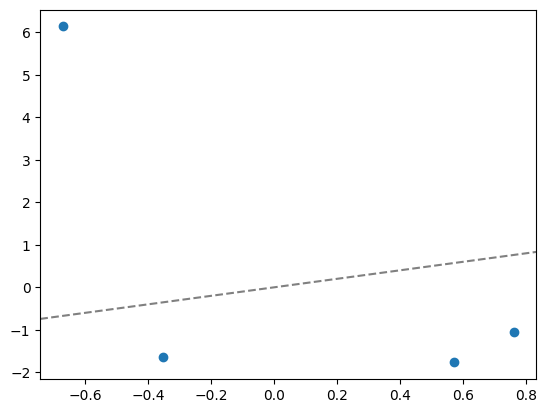

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(sol.solution, ref)
_ = plt.axline( (0,0),slope=1,linestyle='--',color='grey')